In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import statistics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

In [2]:
#Reading data from CSV file
matches=pd.read_csv("new_data/matches.csv")
deliveries=pd.read_csv("new_data/deliveries.csv")

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 68.0+ KB


In [3]:
#To check the number of columns containing null values
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])

city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.size

3760638

In [5]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
for team in matches['team2'].unique():
    print(team)

Royal Challengers Bangalore
Rising Pune Supergiant
Kolkata Knight Riders
Kings XI Punjab
Delhi Daredevils
Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rajasthan Royals
Chennai Super Kings
Deccan Chargers
Pune Warriors
Kochi Tuskers Kerala
Rising Pune Supergiants
Delhi Capitals


In [3]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

In [4]:
matches['winner'].fillna('Draw', inplace=True)

In [9]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [5]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#Make sure to impute the data(cleansing and finding missing data), there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               756 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 68.0+ KB


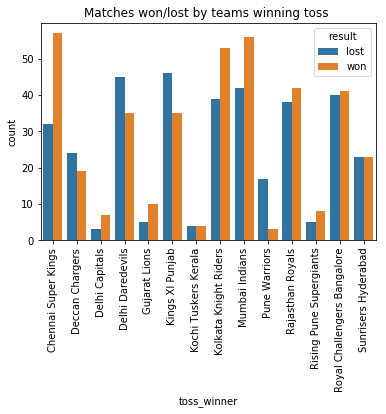

In [11]:
#Toss affecting the win dataframe
toss_win_result = matches.groupby(['toss_winner']).winner.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.winner==toss_win_result.toss_winner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['toss_winner','result'])['count'].sum().reset_index()
#Visualization
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_win_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_win_result_df['toss_winner'].unique(),rotation=90)
plt.show()

C:\Users\pratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


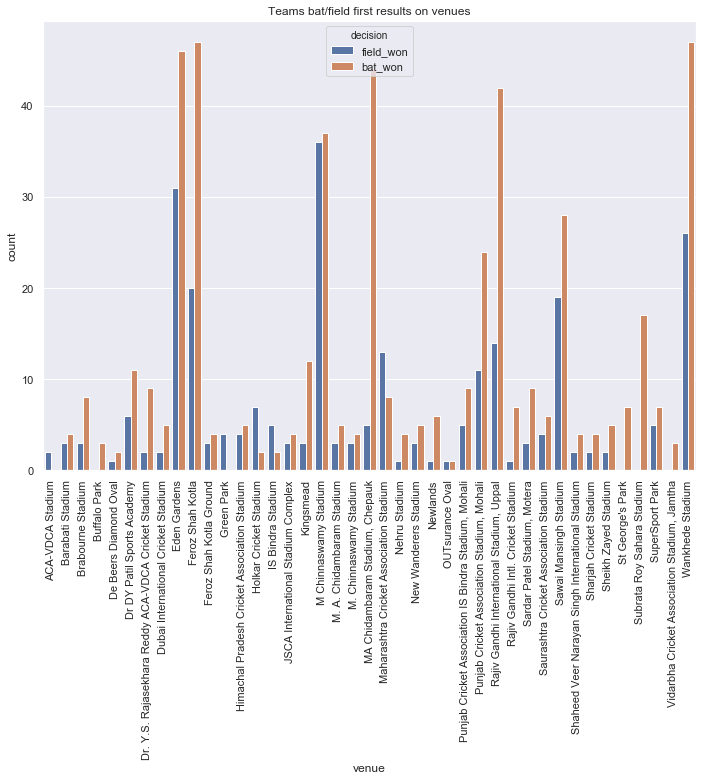

In [12]:
#Winning stats of teams bat/field first by venues 
venue_toss_decision_result=matches[["toss_winner","toss_decision","winner","venue"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue"]).decision.value_counts().reset_index(name="count")
#Visualization
sns.set(rc={'figure.figsize':(10,6)})
plot = sns.barplot(x="venue", y="count", hue="decision", data=venue_result)
plot.set_title('Teams bat/field first results on venues')
plot.set_xticklabels(venue_result['venue'].unique(),rotation=90)
plt.show()

In [32]:
a=matches.winner.unique()
for i in a:
    print(i+'\n')
    df=matches[matches['winner']==i].groupby(['season']).count()[['id']]
    print(df)

Sunrisers Hyderabad

        id
season    
2013    10
2014     6
2015     7
2016    11
2017     8
2018    10
2019     6
Rising Pune Supergiants

        id
season    
2016     5
2017    10
Kolkata Knight Riders

        id
season    
2008     6
2009     3
2010     7
2011     8
2012    12
2013     6
2014    11
2015     7
2016     8
2017     9
2018     9
2019     6
Kings XI Punjab

        id
season    
2008    10
2009     7
2010     4
2011     7
2012     8
2013     8
2014    12
2015     3
2016     4
2017     7
2018     6
2019     6
Royal Challengers Bangalore

        id
season    
2008     4
2009     9
2010     8
2011    10
2012     8
2013     9
2014     5
2015     8
2016     9
2017     3
2018     6
2019     5
Mumbai Indians

        id
season    
2008     7
2009     5
2010    11
2011    10
2012    10
2013    13
2014     7
2015    10
2016     7
2017    12
2018     6
2019    11
Delhi Daredevils

        id
season    
2008     7
2009    10
2010     7
2011     4
2012    11
2013     3
2014

In [42]:
ff=matches.groupby(['season','winner']).agg('count')[['id']]
pd.pivot_table(ff, index='winner', columns='season')

id                                            \
season                       2008  2009  2010  2011  2012  2013  2014  2015   
winner                                                                        
Chennai Super Kings           9.0   8.0   9.0  11.0  10.0  12.0  10.0  10.0   
Deccan Chargers               2.0   9.0   8.0   6.0   4.0   NaN   NaN   NaN   
Delhi Capitals                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Delhi Daredevils              7.0  10.0   7.0   4.0  11.0   3.0   2.0   5.0   
Draw                          NaN   NaN   NaN   1.0   NaN   NaN   NaN   2.0   
Gujarat Lions                 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Kings XI Punjab              10.0   7.0   4.0   7.0   8.0   8.0  12.0   3.0   
Kochi Tuskers Kerala          NaN   NaN   NaN   6.0   NaN   NaN   NaN   NaN   
Kolkata Knight Riders         6.0   3.0   7.0   8.0  12.0   6.0  11.0   7.0   
Mumbai Indians                7.0   5.0  11.0  10.0  10.0  13.0   7.0  10.0   
Pune Warriors                 NaN   NaN   NaN   4.0   4.0   4.0   NaN   NaN   
Rajasthan Royals             13.0   6.0   6.0   6.0   7.0  11.0   7.0   7.0   
Rising Pune Supergiants       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Royal Challengers Bangalore   4.0   9.0   8.0  10.0   8.0   9.0   5.0   8.0   
Sunrisers Hyderabad           NaN   NaN   NaN   NaN   NaN  10.0   6.0   7.0   

                                                     
season                       2016  2017  2018  2019  
winner                                               
Chennai Super Kings           NaN   NaN  11.0  10.0  
Deccan Chargers               NaN   NaN   NaN   NaN  
Delhi Capitals                NaN   NaN   NaN  10.0  
Delhi Daredevils              7.0   6.0   5.0   NaN  
Draw                          NaN   NaN   NaN   1.0  
Gujarat Lions                 9.0   4.0   NaN   NaN  
Kings XI Punjab               4.0   7.0   6.0   6.0  
Kochi Tuskers Kerala          NaN   NaN   NaN   NaN  
Kolkata Knight Riders         8.0   9.0   9.0   6.0  
Mumbai Indians                7.0  12.0   6.0  11.0  
Pune Warriors                 NaN   NaN   NaN   NaN  
Rajasthan Royals              NaN   NaN   7.0   5.0  
Rising Pune Supergiants       5.0  10.0   NaN   NaN  
Royal Challengers Bangalore   9.0   3.0   6.0   5.0  
Sunrisers Hyderabad          11.0   8.0  10.0   6.0

Text(0.5,1,'No of matches won by different teams')

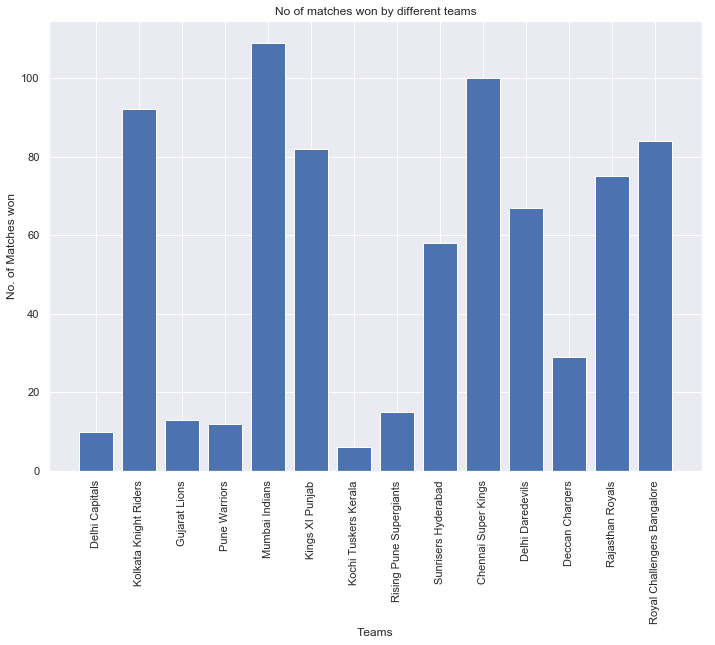

In [13]:
teams = list(set(matches.loc[:,'team1']))
matches_won = [len(matches.loc[matches['winner'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')


In [14]:
#encoder
encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

In [15]:
#outcome variable as a probability of team1 winning
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1

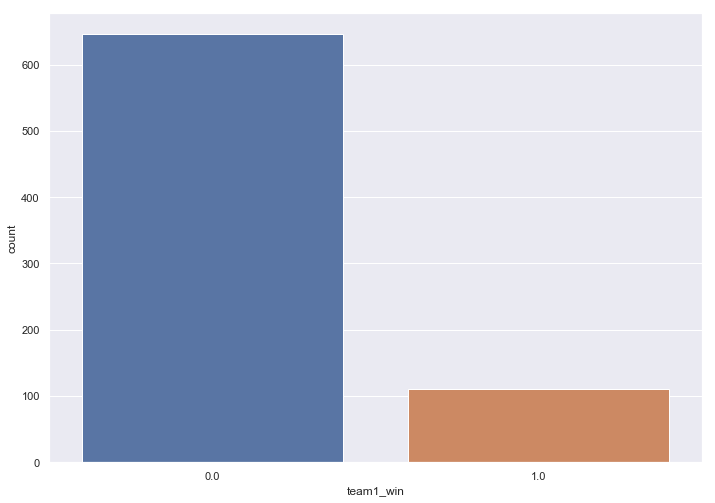

In [16]:
#Checking for the distribution of the dataset
sns.countplot(x="team1_win",data=matches)
plt.show()

In [17]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

In [18]:
#dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
print(correlation_matrix)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
prediction_df.drop(columns=correlated_features).head() 

                   team1     team2  team1_toss_win  team1_bat     venue
team1           1.000000 -0.107006       -0.119418  -0.119418  0.108539
team2          -0.107006  1.000000       -0.010893  -0.010893  0.081898
team1_toss_win -0.119418 -0.010893        1.000000   1.000000  0.049083
team1_bat      -0.119418 -0.010893        1.000000   1.000000  0.049083
venue           0.108539  0.081898        0.049083   0.049083  1.000000


,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,0.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,12,3,1.0,0.0,17


In [19]:
prediction_df.to_csv('prediction_df.csv')

In [20]:
#feature selection
X = prediction_df.drop('team1_win', axis=1)
y = prediction_df['team1_win']
y=y.astype(int)

In [21]:
logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg, 20)
rfe = rfe.fit(X, y.values.ravel())
#Checking for the features of they are important
print(rfe.support_)

[ True  True  True  True  True]


0.0    646
1.0    110
Name: team1_win, dtype: int64

In [23]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [48]:
score_rf=[]
score_rf_smote=[]
#Splitting the data into training and testing data and scaling it using StratifiedKFold
skf= StratifiedKFold(n_splits=3, random_state=5, shuffle=True)
for train_index, test_index in skf.split(X,y):
    X_train1, X_test1 = X.loc[train_index], X.loc[test_index]
    y_train1, y_test1 =y.loc[train_index], y.loc[test_index]
    rf=RandomForestClassifier(n_estimators=1000)
    rf.fit(X_train, y_train)
    # Predict on training set
    nor_preds = rf.predict(X_test)
    # Checking accuracy and recall
    score_rf.append(rf.score(X_test, y_test))
    
    smote_x_train1, smote_y_train1 = sm.fit_sample(X_train1.astype('float'), y_train1)
    rf.fit(smote_x_train1, smote_y_train1)
    smote_preds = rf.predict(X_test)
    score_rf_smote.append(rf.score(X_test, y_test))
print(statistics.mean(score_rf))
print(statistics.mean(score_rf_smote))    
    
    
    

0.8800705467372134
0.9294532627865961


In [41]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
smote_x_train, smote_y_train = sm.fit_sample(X_train.astype('float'), y_train)

print(X_train.shape, y_train.shape)
# Separate into training and test sets
#smote_x_train = pd.DataFrame(smote_x_train, columns = X_train.columns)
#smote_y_train = pd.DataFrame(smote_y_train, columns = ['team1_win'])
rf=RandomForestClassifier(n_estimators=1000)

rf.fit(smote_x_train, smote_y_train) 
# Predict on training set
smote_preds = rf.predict(X_test)
# Checking accuracy and recall
print('Accuracy Score: ', rf.score(X_test, y_test),'\n\n')  
print('Averaged Recall Score: ', recall_score(y_test, smote_preds, average='micro'), '\n\n')
print(classification_report(y_test, smote_preds))

rf.fit(X_train, y_train)
# Predict on training set
nor_preds = rf.predict(X_test)
# Checking accuracy and recall
print('Accuracy Score: ', rf.score(X_test, y_test),'\n\n')  
print('Averaged Recall Score: ', recall_score(y_test, nor_preds, average='micro'), '\n\n')
print(classification_report(y_test, nor_preds))


(567, 5) (567,)
Accuracy Score:  0.8624338624338624 


Averaged Recall Score:  0.8624338624338624 


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       163
           1       0.50      0.62      0.55        26

    accuracy                           0.86       189
   macro avg       0.72      0.76      0.74       189
weighted avg       0.88      0.86      0.87       189

Accuracy Score:  0.8783068783068783 


Averaged Recall Score:  0.8783068783068783 


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       163
           1       0.56      0.58      0.57        26

    accuracy                           0.88       189
   macro avg       0.74      0.75      0.75       189
weighted avg       0.88      0.88      0.88       189



In [42]:
smote_y_train.value_counts()

1    483
0    483
Name: team1_win, dtype: int64

In [43]:

print(pd.crosstab(y_test, smote_preds))
print(pd.crosstab(y_test, nor_preds))

col_0        0   1
team1_win         
0          147  16
1           10  16
col_0        0   1
team1_win         
0          151  12
1           11  15


In [33]:
from collections import Counter
print('Before Sampling ',Counter(y_train))
print('After Sampling ',Counter(smote_y_train))

Before Sampling  Counter({0: 483, 1: 84})
After Sampling  Counter({0: 483, 1: 483})


In [51]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('For Train-Test Percentage Split : \n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}% \n'.format(logreg.score(X_test, y_test)*100))


For Train-Test Percentage Split : 

[[135  31]
 [  4  19]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.89       166
           1       0.38      0.83      0.52        23

    accuracy                           0.81       189
   macro avg       0.68      0.82      0.70       189
weighted avg       0.90      0.81      0.84       189

Accuracy of logistic regression classifier on test set: 81.48% 



C:\Users\pratik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
#SVM
svm=SVC()
print('For Train-Test Percentage Split : \n')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}% \n'.format(svm.score(X_test, y_test)*100))
print('For Stratified K Fold : \n')
svm.fit(X_train1, y_train1)
y_pred1 = svm.predict(X_test1)
print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))
print('Accuracy of logistic regression classifier on test set: {:.2f}% \n'.format(svm.score(X_test1, y_test1)*100))

For Train-Test Percentage Split : 

[[122   7]
 [ 18   5]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       129
           1       0.42      0.22      0.29        23

    accuracy                           0.84       152
   macro avg       0.64      0.58      0.60       152
weighted avg       0.80      0.84      0.81       152

Accuracy of logistic regression classifier on test set: 83.55% 

For Stratified K Fold : 

[[64  0]
 [11  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        64
           1       0.00      0.00      0.00        11

    accuracy                           0.85        75
   macro avg       0.43      0.50      0.46        75
weighted avg       0.73      0.85      0.79        75

Accuracy of logistic regression classifier on test set: 85.33% 



C:\Users\pratik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pratik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pratik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[118  11]
 [ 10  13]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       129
           1       0.54      0.57      0.55        23

    accuracy                           0.86       152
   macro avg       0.73      0.74      0.74       152
weighted avg       0.86      0.86      0.86       152

Accuracy of decision tree classifier on test set: 0.8618


In [29]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Confusion matrix
 [[117  12]
 [ 13  10]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       129
           1       0.45      0.43      0.44        23

    accuracy                           0.84       152
   macro avg       0.68      0.67      0.67       152
weighted avg       0.83      0.84      0.83       152

Accuracy of random forest classifier on test set: 0.8355


In [30]:
#KNearestNeighbours
knn =KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(knn.score(X_test, y_test)))

Confusion matrix
 [[116  13]
 [ 14   9]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       129
           1       0.41      0.39      0.40        23

    accuracy                           0.82       152
   macro avg       0.65      0.65      0.65       152
weighted avg       0.82      0.82      0.82       152

Accuracy of random forest classifier on test set: 0.8224
